 # <b> Car Price Prediction ML Model </b>

## Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection and Processing

In [7]:
data = pd.read_csv('C:\\Users\Vimukthi Jayasanka\\Documents\\Data science projects\\Car Price Prediction ML model\\car_data.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

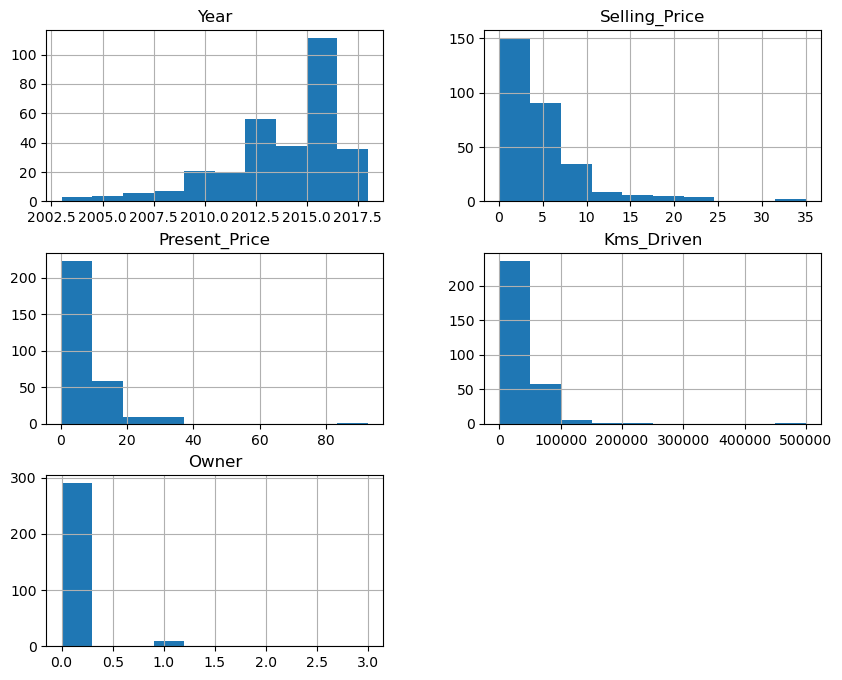

In [22]:
data.hist(figsize=(10,8))

## Encoding the Categorical Data

In [23]:
#Created New Df as data_2 to encode the categorical data

#Encode the Fuel_Type column
data_2 = data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}})

#Encode the Seller_Type column
data_2.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encode the Transmission column
data_2.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [26]:
data_2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Split Data

In [28]:
X = data_2.drop(['Selling_Price','Car_Name'],axis=1)
y = data_2['Selling_Price']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=2)

## Data Exploration

In [32]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'Seller_Type'}>,
        <Axes: title={'center': 'Transmission'}>],
       [<Axes: title={'center': 'Owner'}>,
        <Axes: title={'center': 'Selling_Price'}>, <Axes: >]],
      dtype=object)

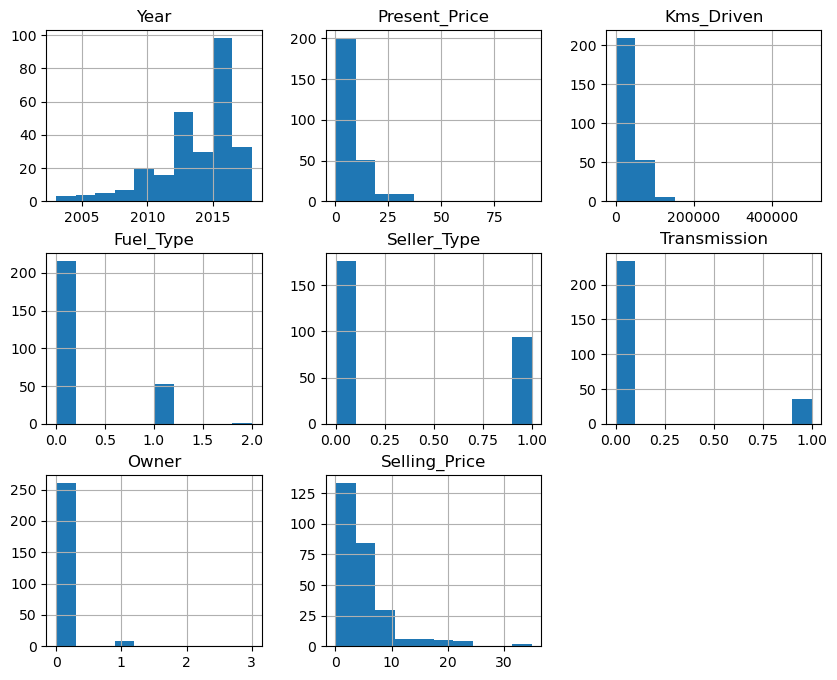

In [33]:
train_data.hist(figsize=(10,8))

In [34]:
train_data.corr()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
Year,1.000000,-0.040662,-0.526696,0.087304,-0.059620,-0.020443,-0.157241,0.251059
Present_Price,-0.040662,1.000000,0.190132,0.454139,-0.497530,0.369677,0.016289,0.875524
Kms_Driven,-0.526696,0.190132,1.000000,0.145187,-0.077955,0.186396,0.084502,0.010523
Fuel_Type,0.087304,0.454139,0.145187,1.000000,-0.342593,0.123457,-0.051072,0.538508
Seller_Type,-0.059620,-0.497530,-0.077955,-0.342593,1.000000,-0.080811,0.116835,-0.535507
Transmission,-0.020443,0.369677,0.186396,0.123457,-0.080811,1.000000,0.059972,0.383294
Owner,-0.157241,0.016289,0.084502,-0.051072,0.116835,0.059972,1.000000,-0.083247
Selling_Price,0.251059,0.875524,0.010523,0.538508,-0.535507,0.383294,-0.083247,1.000000


<Axes: >

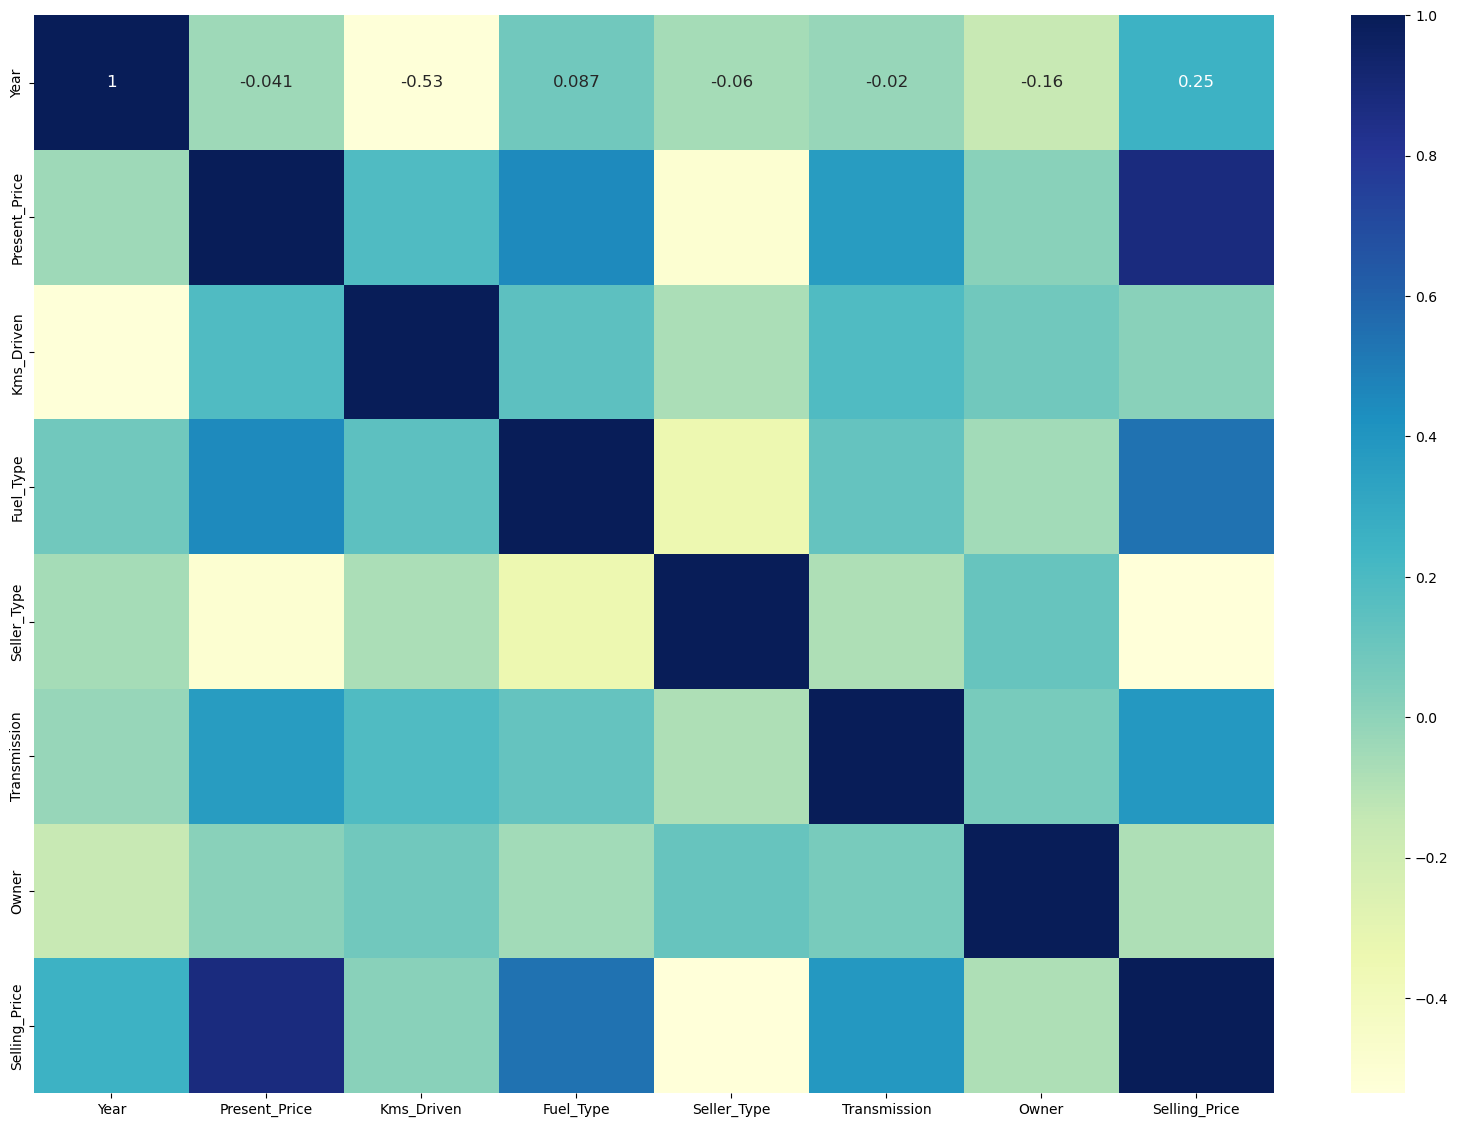

In [36]:
plt.figure(figsize=(20,14))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu",annot_kws={"size": 12})

## Model Training

### Linear Regression Model

In [37]:
lin_model = LinearRegression().fit(X_train,y_train)

#### Model Evaluvation

In [39]:
lin_model.score(X_test,y_test)

0.836576671502587

In [40]:
# predict on Training data
train_data_prediction = lin_model.predict(X_train)

In [41]:
#R Squared Error in Training Data
error_score = metrics.r2_score(y_train,train_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8799451660493716


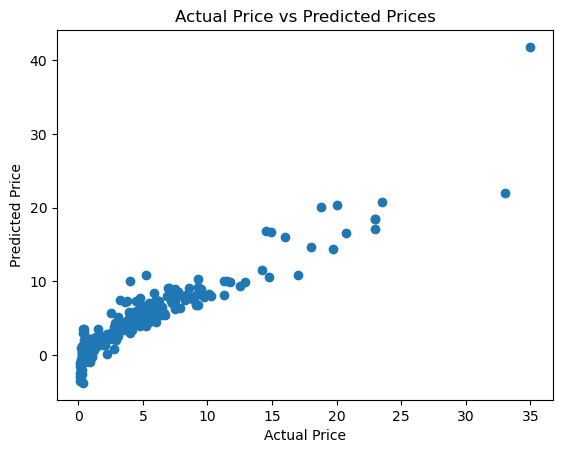

In [43]:
# Visualize the actual prices and predicted prices

plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [46]:
# predict on Testing data
test_data_prediction = lin_model.predict(X_test)

In [47]:
#R Squared Error in Test Data
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error in Test :", error_score)

R squared Error in Test : 0.836576671502587


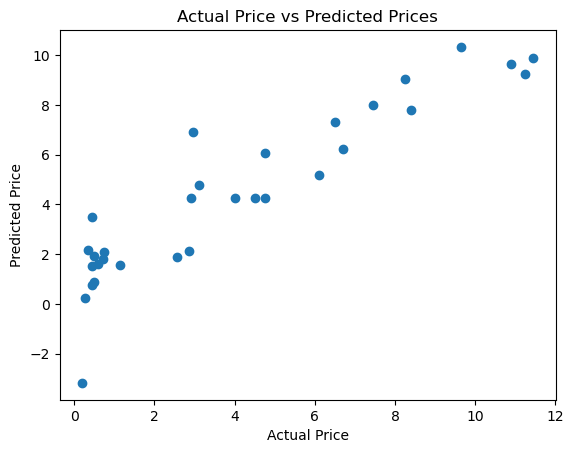

In [48]:
# Visualize the actual prices and predicted prices

plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

### Lasso Regression Model

In [49]:
lasso_model = Lasso().fit(X_train,y_train)

In [50]:
lasso_model.score(X_test,y_test)

0.8709167941173195

In [51]:
# predict on Training data
train_data_prediction = lasso_model.predict(X_train)

In [62]:
#R Squared Error in Training Data
error_score = metrics.r2_score(y_train,train_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8427856123435794


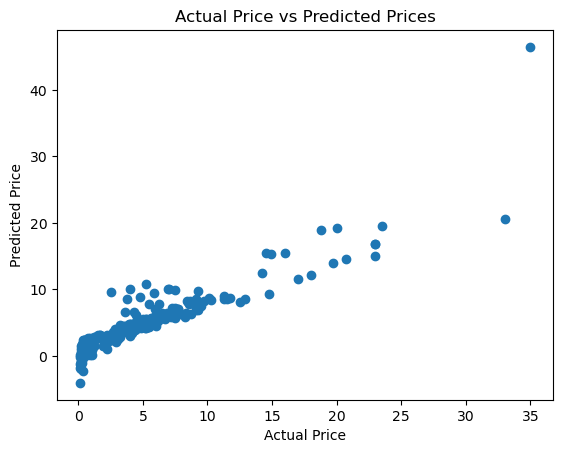

In [53]:
# Visualize the actual prices and predicted prices

plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [55]:
# predict on Testing data
test_data_prediction = lasso_model.predict(X_test)

In [56]:
#R Squared Error in Test Data
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error in Test :", error_score)

R squared Error in Test : 0.8709167941173195


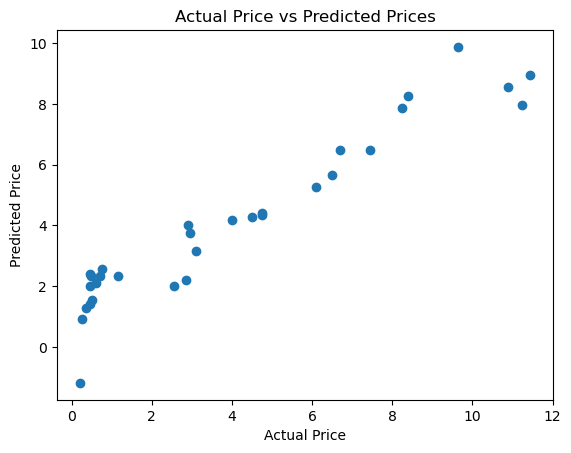

In [57]:
# Visualize the actual prices and predicted prices

plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

### XGBOOST Model

In [58]:
import xgboost as xgb

In [59]:
xgb_model = xgb.XGBRegressor(enable_categorical=True,random_state=42)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
xgb_model.score(X_test,y_test)

0.9807321370840111

In [63]:
# predict on Training data
train_data_prediction = xgb_model.predict(X_train)

In [64]:
#R Squared Error in Training Data
error_score = metrics.r2_score(y_train,train_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.9999896680984235


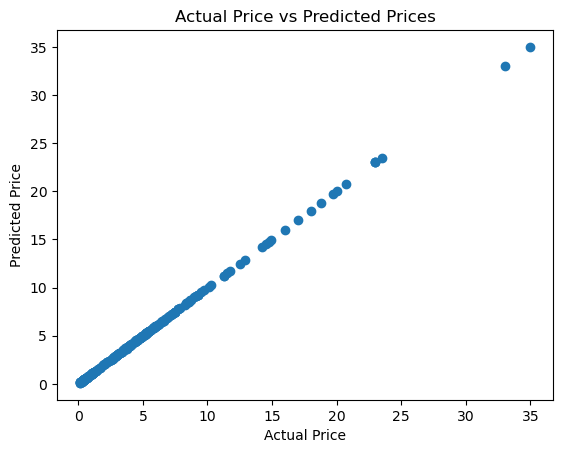

In [65]:
# Visualize the actual prices and predicted prices

plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [66]:
# predict on Testing data
test_data_prediction = xgb_model.predict(X_test)

In [67]:
#R Squared Error in Test Data
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error in Test :", error_score)

R squared Error in Test : 0.9807321370840111


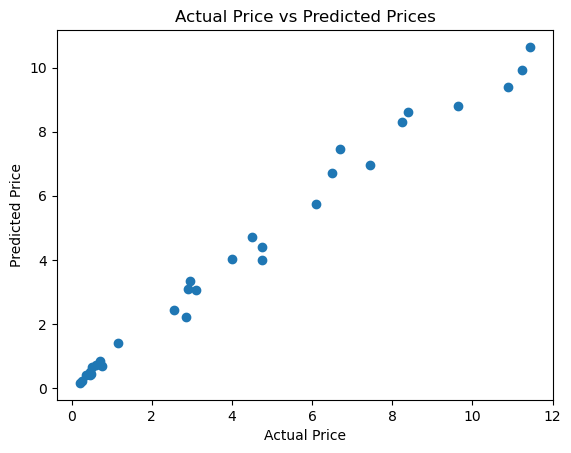

In [68]:
# Visualize the actual prices and predicted prices

plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()